In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re
import datetime

In [2]:
#Request for 5k Result and checking status code
url5k="https://www.hubertiming.com/results/2019Cinco5k"
response5k=requests.get(url5k)
print(response5k.status_code)

200


In [3]:
page5k=response5k.text
soup5k=BeautifulSoup(page5k,"lxml")
#soup5k.prettify()

In [4]:
title5k=soup5k.title

In [5]:
print(title5k.text)

Race results for the 2019 Cinco de Mayo 5K 10K Half!


In [6]:
#Get the able Content
table5k=soup5k.find("table",attrs={"id":"individualResults"})
#table5k

In [38]:
#get the rows of table
rows5k=soup5k.find_all("tr")
#rows5k

In [8]:
result_list5k=[]
for rows in rows5k:
    cells5k=rows.find_all('td')
    cells_to_string5k=str(cells5k)
    cells_sub5k=(re.sub(re.compile('<.*?>'),'',cells_to_string5k))
    result_list5k.append(cells_sub5k)

In [37]:
#converting Result Table to Data Frame
result5k=pd.DataFrame(result_list5k)
#result5k

In [10]:
#split each row to cell with ","

result_split5k=result5k[0].str.split(",",expand=True)
result_split5k.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,389],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,157],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,232],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,[1,3465,\r\n\r\n ANDREW LOAIZA\r\n...,M,31,PORTLAND,OR,17:00,5:28,\r\n\r\n 1 of 157\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 17\r\n\r\n ...,0:02,17:02]
6,[2,3471,\r\n\r\n JOE DUDMAN\r\n\r\...,M,54,PORTLAND,OR,19:03,6:07,\r\n\r\n 2 of 157\r\n\r\n ...,M 50-54,\r\n\r\n 1 of 19\r\n\r\n ...,0:02,19:05]
7,[3,3248,\r\n\r\n IRIS POWELL\r\n\r...,F,31,PORTLAND,OR,19:05,6:08,\r\n\r\n 1 of 232\r\n\r\n ...,F 30-34,\r\n\r\n 1 of 33\r\n\r\n ...,0:03,19:08]
8,[4,3405,\r\n\r\n SEBASTIAN THORP\r...,M,16,HAPPY VALLEY,OR,19:31,6:17,\r\n\r\n 3 of 157\r\n\r\n ...,M 15-19,\r\n\r\n 1 of 3\r\n\r\n ...,0:05,19:36]
9,[5,3352,\r\n\r\n OLIVIA KATBI SMIT...,F,27,PORTLAND,OR,19:50,6:23,\r\n\r\n 2 of 232\r\n\r\n ...,F 25-29,\r\n\r\n 1 of 29\r\n\r\n ...,0:02,19:52]


In [11]:
#removing first 5 records
result_remove5k=result_split5k[5:]

result_remove5k.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
5,[1,3465,\r\n\r\n ANDREW LOAIZA\r\n...,M,31,PORTLAND,OR,17:00,5:28,\r\n\r\n 1 of 157\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 17\r\n\r\n ...,0:02,17:02]
6,[2,3471,\r\n\r\n JOE DUDMAN\r\n\r\...,M,54,PORTLAND,OR,19:03,6:07,\r\n\r\n 2 of 157\r\n\r\n ...,M 50-54,\r\n\r\n 1 of 19\r\n\r\n ...,0:02,19:05]
7,[3,3248,\r\n\r\n IRIS POWELL\r\n\r...,F,31,PORTLAND,OR,19:05,6:08,\r\n\r\n 1 of 232\r\n\r\n ...,F 30-34,\r\n\r\n 1 of 33\r\n\r\n ...,0:03,19:08]
8,[4,3405,\r\n\r\n SEBASTIAN THORP\r...,M,16,HAPPY VALLEY,OR,19:31,6:17,\r\n\r\n 3 of 157\r\n\r\n ...,M 15-19,\r\n\r\n 1 of 3\r\n\r\n ...,0:05,19:36]
9,[5,3352,\r\n\r\n OLIVIA KATBI SMIT...,F,27,PORTLAND,OR,19:50,6:23,\r\n\r\n 2 of 232\r\n\r\n ...,F 25-29,\r\n\r\n 1 of 29\r\n\r\n ...,0:02,19:52]
10,[6,3380,\r\n\r\n ORAIN HIBBERT\r\n...,M,32,PORTLAND,OR,20:15,6:31,\r\n\r\n 4 of 157\r\n\r\n ...,M 30-34,\r\n\r\n 2 of 17\r\n\r\n ...,0:08,20:23]
11,[7,3442,\r\n\r\n DAVE ROSS\r\n\r\n...,M,51,BEAVERTON,OR,20:56,6:44,\r\n\r\n 5 of 157\r\n\r\n ...,M 50-54,\r\n\r\n 2 of 19\r\n\r\n ...,0:02,20:58]
12,[8,3272,\r\n\r\n JOE DVORAK\r\n\r\...,M,43,PORTLAND,OR,21:38,6:58,\r\n\r\n 6 of 157\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 14\r\n\r\n ...,0:04,21:42]
13,[9,3356,\r\n\r\n ANDREW HAYES\r\n\...,M,24,GRESHAM,OR,21:42,6:59,\r\n\r\n 7 of 157\r\n\r\n ...,M 20-24,\r\n\r\n 1 of 8\r\n\r\n ...,0:23,22:05]
14,[10,3413,\r\n\r\n JACK WINTERS\r\n\...,M,61,PORTLAND,OR,21:58,7:04,\r\n\r\n 8 of 157\r\n\r\n ...,M 60-64,\r\n\r\n 1 of 4\r\n\r\n ...,0:03,22:01]


In [12]:
#Getting table name to set for columns name
table5k=soup5k.find("table",attrs={"id":"individualResults"})
header5k=table5k.find_all("th")
column_names5k=[]
for row in header5k:
    column_names5k.append(row.text)
column_names5k

result_remove5k.columns=column_names5k
result_last5k=result_remove5k
result_remove5k.head()


,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
5,[1,3465,\r\n\r\n ANDREW LOAIZA\r\n...,M,31,PORTLAND,OR,17:00,5:28,\r\n\r\n 1 of 157\r\n\r\n ...,M 30-34,\r\n\r\n 1 of 17\r\n\r\n ...,0:02,17:02]
6,[2,3471,\r\n\r\n JOE DUDMAN\r\n\r\...,M,54,PORTLAND,OR,19:03,6:07,\r\n\r\n 2 of 157\r\n\r\n ...,M 50-54,\r\n\r\n 1 of 19\r\n\r\n ...,0:02,19:05]
7,[3,3248,\r\n\r\n IRIS POWELL\r\n\r...,F,31,PORTLAND,OR,19:05,6:08,\r\n\r\n 1 of 232\r\n\r\n ...,F 30-34,\r\n\r\n 1 of 33\r\n\r\n ...,0:03,19:08]
8,[4,3405,\r\n\r\n SEBASTIAN THORP\r...,M,16,HAPPY VALLEY,OR,19:31,6:17,\r\n\r\n 3 of 157\r\n\r\n ...,M 15-19,\r\n\r\n 1 of 3\r\n\r\n ...,0:05,19:36]
9,[5,3352,\r\n\r\n OLIVIA KATBI SMIT...,F,27,PORTLAND,OR,19:50,6:23,\r\n\r\n 2 of 232\r\n\r\n ...,F 25-29,\r\n\r\n 1 of 29\r\n\r\n ...,0:02,19:52]


In [13]:
result_last5k['Place']=result_remove5k["Place"].str.replace("[",'')
result_last5k['Name']=result_remove5k['Name'].str.replace("\r\n","")
result_last5k['Name']=result_remove5k['Name'].str.replace('...','',3)
result_last5k['Gender Place']=result_remove5k['Gender Place'].str.replace("\r\n","")
result_last5k["Age Group Place"]=result_remove5k["Age Group Place"].str.replace("\r\n","")
result_last5k["Age Group"]=result_remove5k["Age Group"].str.replace("M","")
result_last5k["Age Group"]=result_remove5k["Age Group"].str.replace("F","")
result_last5k["Gun Time"]=result_remove5k["Gun Time"].str.replace("]","")
result_last5k["Chip Pace"]=result_remove5k["Chip Pace"].str.replace(":",".")

C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [14]:
result_last5k.head(10)

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
5,1,3465,ANDREW LOAIZA,M,31,PORTLAND,OR,17:00,5.28,1 of 157,30-34,1 of 17,0:02,17:02
6,2,3471,JOE DUDMAN,M,54,PORTLAND,OR,19:03,6.07,2 of 157,50-54,1 of 19,0:02,19:05
7,3,3248,IRIS POWELL,F,31,PORTLAND,OR,19:05,6.08,1 of 232,30-34,1 of 33,0:03,19:08
8,4,3405,SEBASTIAN THORP,M,16,HAPPY VALLEY,OR,19:31,6.17,3 of 157,15-19,1 of 3,0:05,19:36
9,5,3352,OLIVIA KATBI SMITH,F,27,PORTLAND,OR,19:50,6.23,2 of 232,25-29,1 of 29,0:02,19:52
10,6,3380,ORAIN HIBBERT,M,32,PORTLAND,OR,20:15,6.31,4 of 157,30-34,2 of 17,0:08,20:23
11,7,3442,DAVE ROSS,M,51,BEAVERTON,OR,20:56,6.44,5 of 157,50-54,2 of 19,0:02,20:58
12,8,3272,JOE DVORAK,M,43,PORTLAND,OR,21:38,6.58,6 of 157,40-44,1 of 14,0:04,21:42
13,9,3356,ANDREW HAYES,M,24,GRESHAM,OR,21:42,6.59,7 of 157,20-24,1 of 8,0:23,22:05
14,10,3413,JACK WINTERS,M,61,PORTLAND,OR,21:58,7.04,8 of 157,60-64,1 of 4,0:03,22:01


In [15]:
result_last5k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 5 to 393
Data columns (total 14 columns):
Place              389 non-null object
Bib                389 non-null object
Name               389 non-null object
Gender             389 non-null object
Age                389 non-null object
City               389 non-null object
State              389 non-null object
Chip Time          389 non-null object
Chip Pace          389 non-null object
Gender Place       389 non-null object
Age Group          389 non-null object
Age Group Place    389 non-null object
Time to Start      389 non-null object
Gun Time           389 non-null object
dtypes: object(14)
memory usage: 42.6+ KB


In [16]:
result_last5k['Age']=result_last5k['Age'].astype("int")
result_last5k['Chip Pace']=result_last5k['Chip Pace'].astype("float")

C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
#Created New Column ("RaceTimeSecond") and converting ChipTime to new Column as seconds

TotalRaceTimeArray=[]
for time_array in result_last5k['Chip Time'].str.split(":"):
    TotalRaceTime=0
    coef=60**(len(time_array)-1)
    for time in time_array:
        TotalRaceTime+=int(time)*coef
        coef=coef/60
    TotalRaceTimeArray.append(TotalRaceTime)
result_last5k["RaceTimeSeconds"]=TotalRaceTimeArray

C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [18]:
result_last5k["Race Time"]=result_last5k.RaceTimeSeconds.apply(lambda x: datetime.timedelta(seconds=x))
result_last5k.head(10)

C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,RaceTimeSeconds,Race Time
5,1,3465,ANDREW LOAIZA,M,31,PORTLAND,OR,17:00,5.28,1 of 157,30-34,1 of 17,0:02,17:02,1020.0,00:17:00
6,2,3471,JOE DUDMAN,M,54,PORTLAND,OR,19:03,6.07,2 of 157,50-54,1 of 19,0:02,19:05,1143.0,00:19:03
7,3,3248,IRIS POWELL,F,31,PORTLAND,OR,19:05,6.08,1 of 232,30-34,1 of 33,0:03,19:08,1145.0,00:19:05
8,4,3405,SEBASTIAN THORP,M,16,HAPPY VALLEY,OR,19:31,6.17,3 of 157,15-19,1 of 3,0:05,19:36,1171.0,00:19:31
9,5,3352,OLIVIA KATBI SMITH,F,27,PORTLAND,OR,19:50,6.23,2 of 232,25-29,1 of 29,0:02,19:52,1190.0,00:19:50
10,6,3380,ORAIN HIBBERT,M,32,PORTLAND,OR,20:15,6.31,4 of 157,30-34,2 of 17,0:08,20:23,1215.0,00:20:15
11,7,3442,DAVE ROSS,M,51,BEAVERTON,OR,20:56,6.44,5 of 157,50-54,2 of 19,0:02,20:58,1256.0,00:20:56
12,8,3272,JOE DVORAK,M,43,PORTLAND,OR,21:38,6.58,6 of 157,40-44,1 of 14,0:04,21:42,1298.0,00:21:38
13,9,3356,ANDREW HAYES,M,24,GRESHAM,OR,21:42,6.59,7 of 157,20-24,1 of 8,0:23,22:05,1302.0,00:21:42
14,10,3413,JACK WINTERS,M,61,PORTLAND,OR,21:58,7.04,8 of 157,60-64,1 of 4,0:03,22:01,1318.0,00:21:58


In [19]:
result_last5k["Race Type"]="5k"
result_last5k.head(4)

Final_result_5k=result_remove5k[["Place","Name",'Gender','Age','Race Time','Chip Pace','Age Group','Race Type']]

C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:

Final_result_5k.reset_index(inplace=True)
Final_result_5k.head(10)

,index,Place,Name,Gender,Age,Race Time,Chip Pace,Age Group,Race Type
0,5,1,ANDREW LOAIZA,M,31,00:17:00,5.28,30-34,5k
1,6,2,JOE DUDMAN,M,54,00:19:03,6.07,50-54,5k
2,7,3,IRIS POWELL,F,31,00:19:05,6.08,30-34,5k
3,8,4,SEBASTIAN THORP,M,16,00:19:31,6.17,15-19,5k
4,9,5,OLIVIA KATBI SMITH,F,27,00:19:50,6.23,25-29,5k
5,10,6,ORAIN HIBBERT,M,32,00:20:15,6.31,30-34,5k
6,11,7,DAVE ROSS,M,51,00:20:56,6.44,50-54,5k
7,12,8,JOE DVORAK,M,43,00:21:38,6.58,40-44,5k
8,13,9,ANDREW HAYES,M,24,00:21:42,6.59,20-24,5k
9,14,10,JACK WINTERS,M,61,00:21:58,7.04,60-64,5k


In [31]:
Final_result_5k["Race Time Minutes"] = round((result_last5k["RaceTimeSeconds"]/60),2)
Final_Results = Final_result_5k[["Place","Name","Gender","Age","Race Time","Race Time Minutes","Chip Pace","Age Group","Race Type"]]
Final_Results["Chip Pace"]= Final_result_5k["Chip Pace"].astype("float")
Final_Results["Race Time Minutes"]= Final_result_5k["Race Time Minutes"].astype("float")

C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Q1042283\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is tryin

In [34]:
##DATA Visualization
print("Brief Information for 5k Result")
print(Final_result_5k[["Age","Race Time Minutes",'Chip Pace']].describe())

Brief Information for 5k Result
              Age  Race Time Minutes   Chip Pace
count  389.000000         384.000000  389.000000
mean    39.439589          37.178932   11.922648
std     13.995013           8.908079    3.420813
min      4.000000          17.000000    5.280000
25%     29.000000          30.672500    9.540000
50%     39.000000          35.675000   11.290000
75%     49.000000          43.940000   14.200000
max     76.000000          57.400000   44.400000


<Figure size 4000x4000 with 0 Axes>

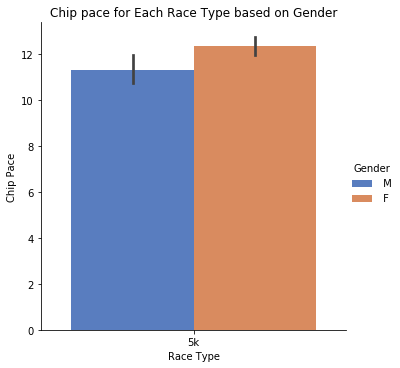

In [25]:
plt.figure(figsize=(20,20),dpi=200)
sns.catplot(x="Race Type",y="Chip Pace",hue="Gender", data=Final_result_5k,kind="bar",palette="muted")
plt.title("Chip pace for Each Race Type based on Gender")
plt.show()

<Figure size 4000x4000 with 0 Axes>

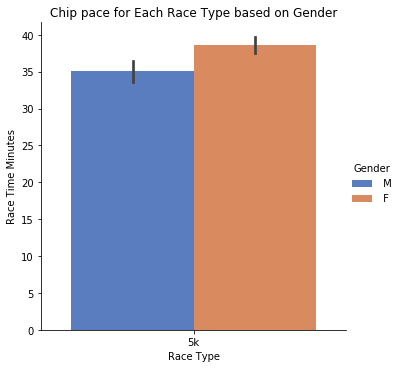

In [35]:
plt.figure(figsize=(20,20),dpi=200)
sns.catplot(x="Race Type",y="Race Time Minutes",hue="Gender", data=Final_result_5k,kind="bar",palette="muted")
plt.title("Chip pace for Each Race Type based on Gender")
plt.show()

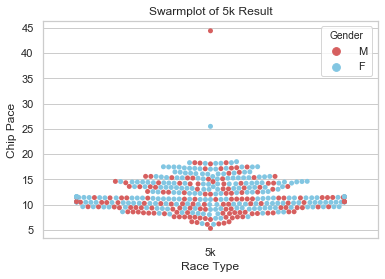

In [36]:
sns.set (style="whitegrid",palette="muted")
sns.swarmplot(x="Race Type",y="Chip Pace",hue="Gender",palette=["r","c","y"],data=Final_result_5k)
plt.title("Swarmplot of 5k Result")
plt.show()